# Value At Risk (VaR)

In [1]:
from datetime import  datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import VaR as var

SUBTRACT_MEAN = False

df = pd.concat((pd.read_excel("data/dateReturns.xlsx", header=None, names=['date']),
                pd.read_excel("data/Returns.xlsx",header=None, names=['return'])), axis=1)

estimation_win_size = 250
win_start = min(df[df['date']>='1995-1-1'].index)
win_start = min(df[df['date']>='1995-12-29'].index)

def normal_est(x,z,p,s):
  sigma = np.std(x, ddof=1)
  return - z[0]*sigma, - z[1]*sigma, sigma

normal95, normal99, sigma, dates, ret = var.est_var(normal_est, SUBTRACT_MEAN, win_start, df, estimation_win_size)


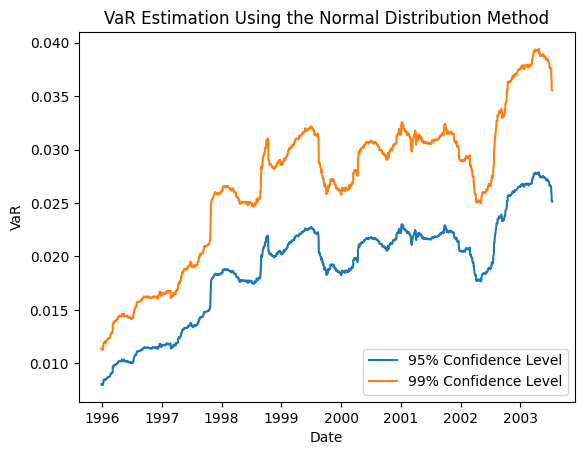

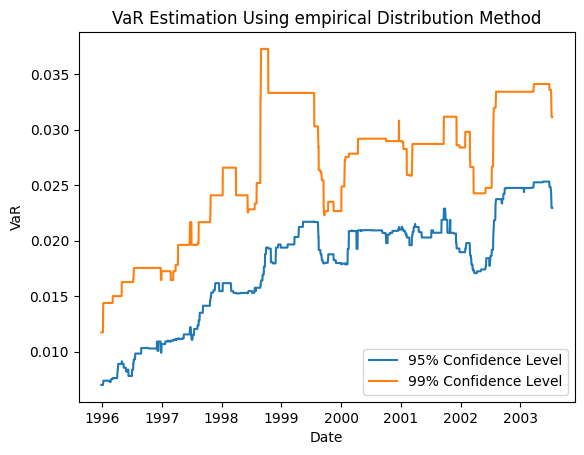

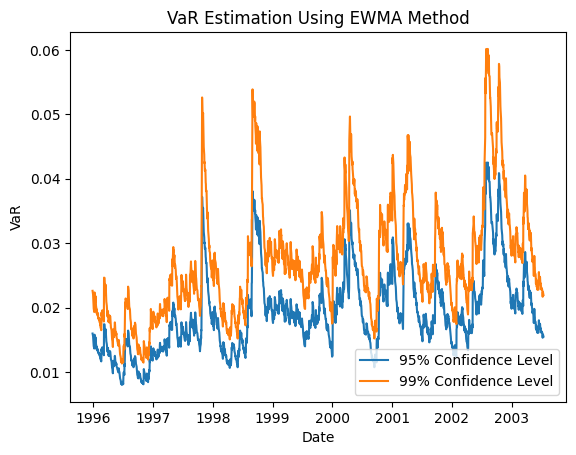

In [4]:
var.plot(plt, normal95, normal99, dates,
     'VaR Estimation Using the Normal Distribution Method')
var.plot(plt, emp95, emp99, dates,
     'VaR Estimation Using empirical Distribution Method')
var.plot(plt, ewma95, ewma99, dates,
     'VaR Estimation Using EWMA Method')



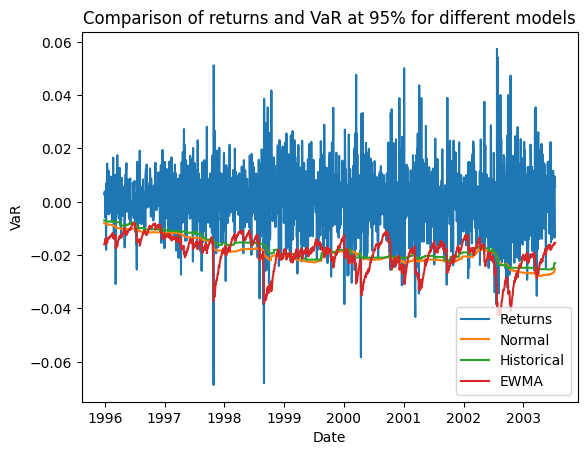

In [7]:


plt.plot(dates, ret)
plt.plot(dates, -normal95)
plt.plot(dates, -emp95)
plt.plot(dates, -ewma95)
# ylabel('VaR')
plt.ylabel('VaR')
# xlabel('Date')
plt.xlabel('Date')
# legend({'95% Confidence Level','99% Confidence Level'},'Location','Best')
plt.legend(['Returns','Normal','Historical','EWMA'], loc="lower right")
# title('VaR Estimation Using the Normal Distribution Method')
plt.title('Comparison of returns and VaR at 95% for different models')
plt.show()

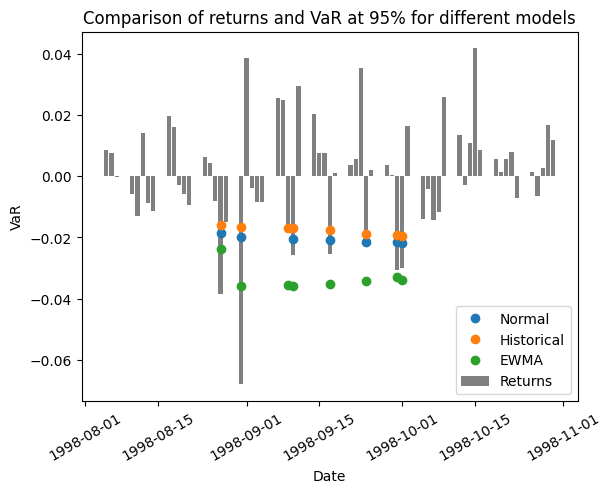

In [8]:
indnorm95 = ret<-normal95
ind_emp95 = ret<-emp95
ind_ewma95 = ret<-ewma95

d_norm95 = dates[indnorm95]
d_emp95 = dates[ind_emp95]
d_ewma95 = dates[ind_emp95]

breach_norm95 = -normal95[indnorm95]
breach_emp95 = -emp95[ind_emp95]
breach_ewma95 = -ewma95[ind_emp95]

def zoom(d):
  boolind = (d>=datetime(1998,8,5))*(d<=datetime(1998,10,31))
  return boolind

plt.cla()

plt.plot(d_norm95[zoom(d_norm95)], breach_norm95[zoom(d_norm95)], "o")
plt.plot(d_emp95[zoom(d_emp95)], breach_emp95[zoom(d_emp95)], "o")
plt.plot(d_ewma95[zoom(d_ewma95)], breach_ewma95[zoom(d_ewma95)], "o")
plt.bar(dates[zoom(dates)], ret[zoom(dates)], color ='gray' )


# ylabel('VaR')
plt.ylabel('VaR')

# xlabel('Date')
plt.xlabel('Date')
# legend({'95% Confidence Level','99% Confidence Level'},'Location','Best')
plt.legend(['Normal','Historical','EWMA','Returns'], loc="lower right")

# title('VaR Estimation Using the Normal Distribution Method')
plt.title('Comparison of returns and VaR at 95% for different models')
plt.xticks(rotation=30)
plt.show()

In [10]:
from scipy import stats

def test_var(breaches, ret, p, name):
  x = len(breaches)
  N = len(ret)
  Z = (x - N*p)/((N*p*(1-p))**0.5)
  cdf_norm = stats.norm.cdf(Z)
  print(f"Name: {name}")
  print(f"Observed probability of breach: {x/N}")
  cdf_binom = stats.binom.cdf(x, N, p)
  print(f"probability of observing {x} or fewer breaches, out of {N} observations, if the true probability is {p}: {cdf_binom}\n")
  print(f"Normal test: {cdf_norm}")
  if cdf_binom<0.95:
      print('Green light\n\n')
  elif cdf_binom<0.9999:
    print('Yellow light\n\n')
  else:
    print('Red light\n\n')



test_var(breach_norm95, ret, 0.05, 'Normal distribution')
test_var(breach_emp95, ret, 0.05, 'Empirical distribution')
test_var(breach_ewma95, ret, 0.05, 'EWMA distribution')

Name: Normal distribution
Observed probability of breach: 0.05134722928317234
probability of observing 101 or fewer breaches, out of 1967 observations, if the true probability is 0.05: 0.6329597720940605

Normal test: 0.6080174200013403
Green light


Name: Empirical distribution
Observed probability of breach: 0.058973055414336555
probability of observing 116 or fewer breaches, out of 1967 observations, if the true probability is 0.05: 0.9672557035871664

Normal test: 0.9660732704629765
Yellow light


Name: EWMA distribution
Observed probability of breach: 0.058973055414336555
probability of observing 116 or fewer breaches, out of 1967 observations, if the true probability is 0.05: 0.9672557035871664

Normal test: 0.9660732704629765
Yellow light




In [19]:
test_var(np.ones(100), np.ones(2000), 0.05, 'Normal distribution')

Name: Normal distribution
Observed probability of breach: 0.05
probability of observing 100 or fewer breaches, out of 2000 observations, if the true probability is 0.05: 0.5265709385410947

Normal test: 0.5
Green light


